In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
new_df = df.drop(['MMM-YY','City','Dateofjoining','LastWorkingDate'], axis=1)

In [8]:
df.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

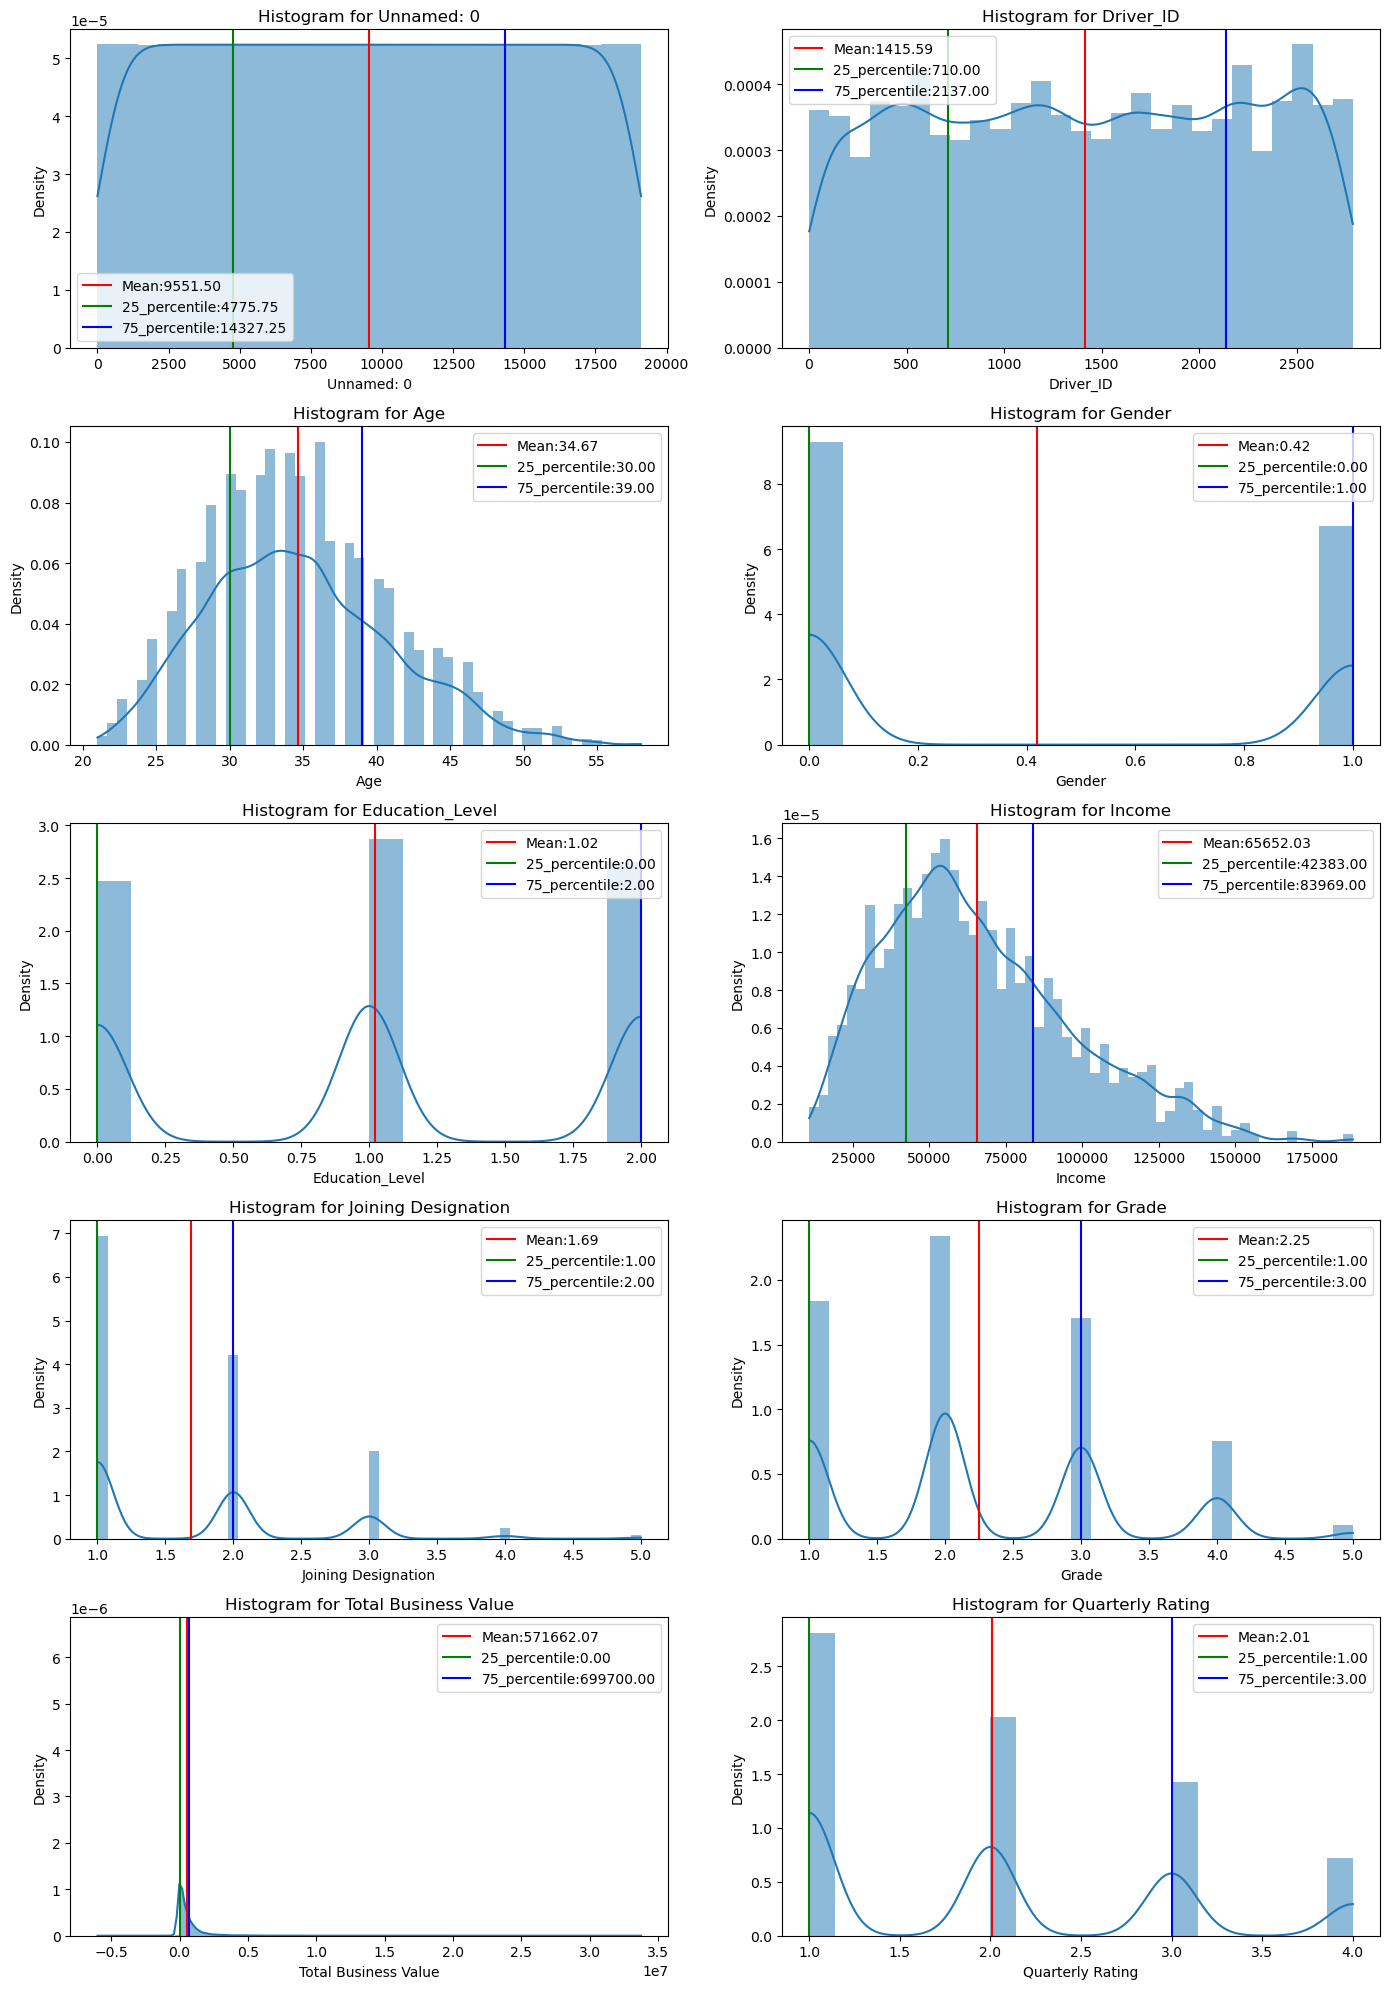

In [9]:
def plot_histograms(dataframe):
    n_features = dataframe.shape[1]
    n_rows = (n_features + 1) // 2
    plt.figure(figsize=(14, n_rows * 4))
    
    for i, cols in enumerate(dataframe.columns, 1):
        plt.subplot(n_rows,2,i)
        sns.histplot(dataframe[cols], kde=True, stat='density', linewidth=0)
        mean_val = dataframe[cols].mean()
        per_25 = dataframe[cols].quantile(0.25)
        per_75 = dataframe[cols].quantile(0.75)
        
        plt.axvline(mean_val, color='r', linestyle='-', label=f'Mean:{mean_val:.2f}')
        plt.axvline(per_25, color='g', linestyle='-', label=f'25_percentile:{per_25:.2f}')
        plt.axvline(per_75, color='b', linestyle='-', label=f'75_percentile:{per_75:.2f}')
        
        plt.title(f'Histogram for {cols}')
        plt.legend()
        
    plt.tight_layout()
    plt.legend()
    
plot_histograms(new_df)

In [10]:
date_columns = ['MMM-YY', 'Dateofjoining', 'LastWorkingDate']

for col in date_columns:
    df[col] = pd.to_datetime(df[col])
    
print(df.dtypes)

Unnamed: 0                       int64
MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object


In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

num_cols = ['Age', 'Gender', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']
num_data = df[num_cols]

imputed_data = imputer.fit_transform(num_data)
imputed_df = pd.DataFrame(imputed_data, columns=num_cols)

df['Age'] = imputed_df['Age']
df['Gender'] = imputed_df['Gender']

missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [12]:
df['Quarterly_Rating_Change'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()
df['Rating_Increased'] = (df['Quarterly_Rating_Change'] > 0).astype(int)

In [13]:
df['target'] = df['LastWorkingDate'].notnull().astype(int)
df['target']

0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: target, Length: 19104, dtype: int32

In [14]:
df.sort_values(by=['Driver_ID', 'MMM-YY'], inplace=True)
df['Income_Increased'] = 0
df['Income_diff'] = df.groupby('Driver_ID')['Income'].diff()
df.loc[df['Income_diff'] > 0, 'Income_Increased'] = 1
df.drop(columns=['Income_diff'], inplace=True)

In [15]:
missing_date = pd.to_datetime('12/12/2020')
df['LastWorkingDate'].fillna(missing_date, inplace=True)
df['Total_num_days'] = (df['LastWorkingDate'] - df['Dateofjoining']).dt.days

In [16]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Change,Rating_Increased,target,Income_Increased,Total_num_days
0,0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,2020-12-12,1,1,2381060,2,NaN,0,0,0,719
1,1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,2020-12-12,1,1,-665480,2,0.0,0,0,0,719
2,2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,0.0,0,1,0,77
3,3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,2020-12-12,2,2,0,1,NaN,0,0,0,36
4,4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,2020-12-12,2,2,0,1,0.0,0,0,0,36


In [17]:
df.isnull().sum()

Unnamed: 0                    0
MMM-YY                        0
Driver_ID                     0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
Dateofjoining                 0
LastWorkingDate               0
Joining Designation           0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Quarterly_Rating_Change    2381
Rating_Increased              0
target                        0
Income_Increased              0
Total_num_days                0
dtype: int64

In [18]:
aggregated_data = df.groupby('Driver_ID').agg({
    'Age': 'last',
    'Gender': 'max',
    'City': 'last',
    'Education_Level': 'last',
    'Income': 'last',
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last',
    'Joining Designation': 'first',
    'Grade': 'last',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'last',
    'target': 'last',
    'Rating_Increased': 'max',
    'Income_Increased': 'max',
    'Total_num_days': 'max'
}).reset_index()

aggregated_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,Rating_Increased,Income_Increased,Total_num_days
0,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1,0,0,719
1,2,31.0,0.0,C7,2,67016,2020-11-06,2020-12-12,2,2,0,1,0,0,0,36
2,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1,0,0,371
3,5,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1,0,0,703
4,6,31.0,1.0,C11,1,78728,2020-07-31,2020-12-12,3,3,1265000,2,0,1,0,134


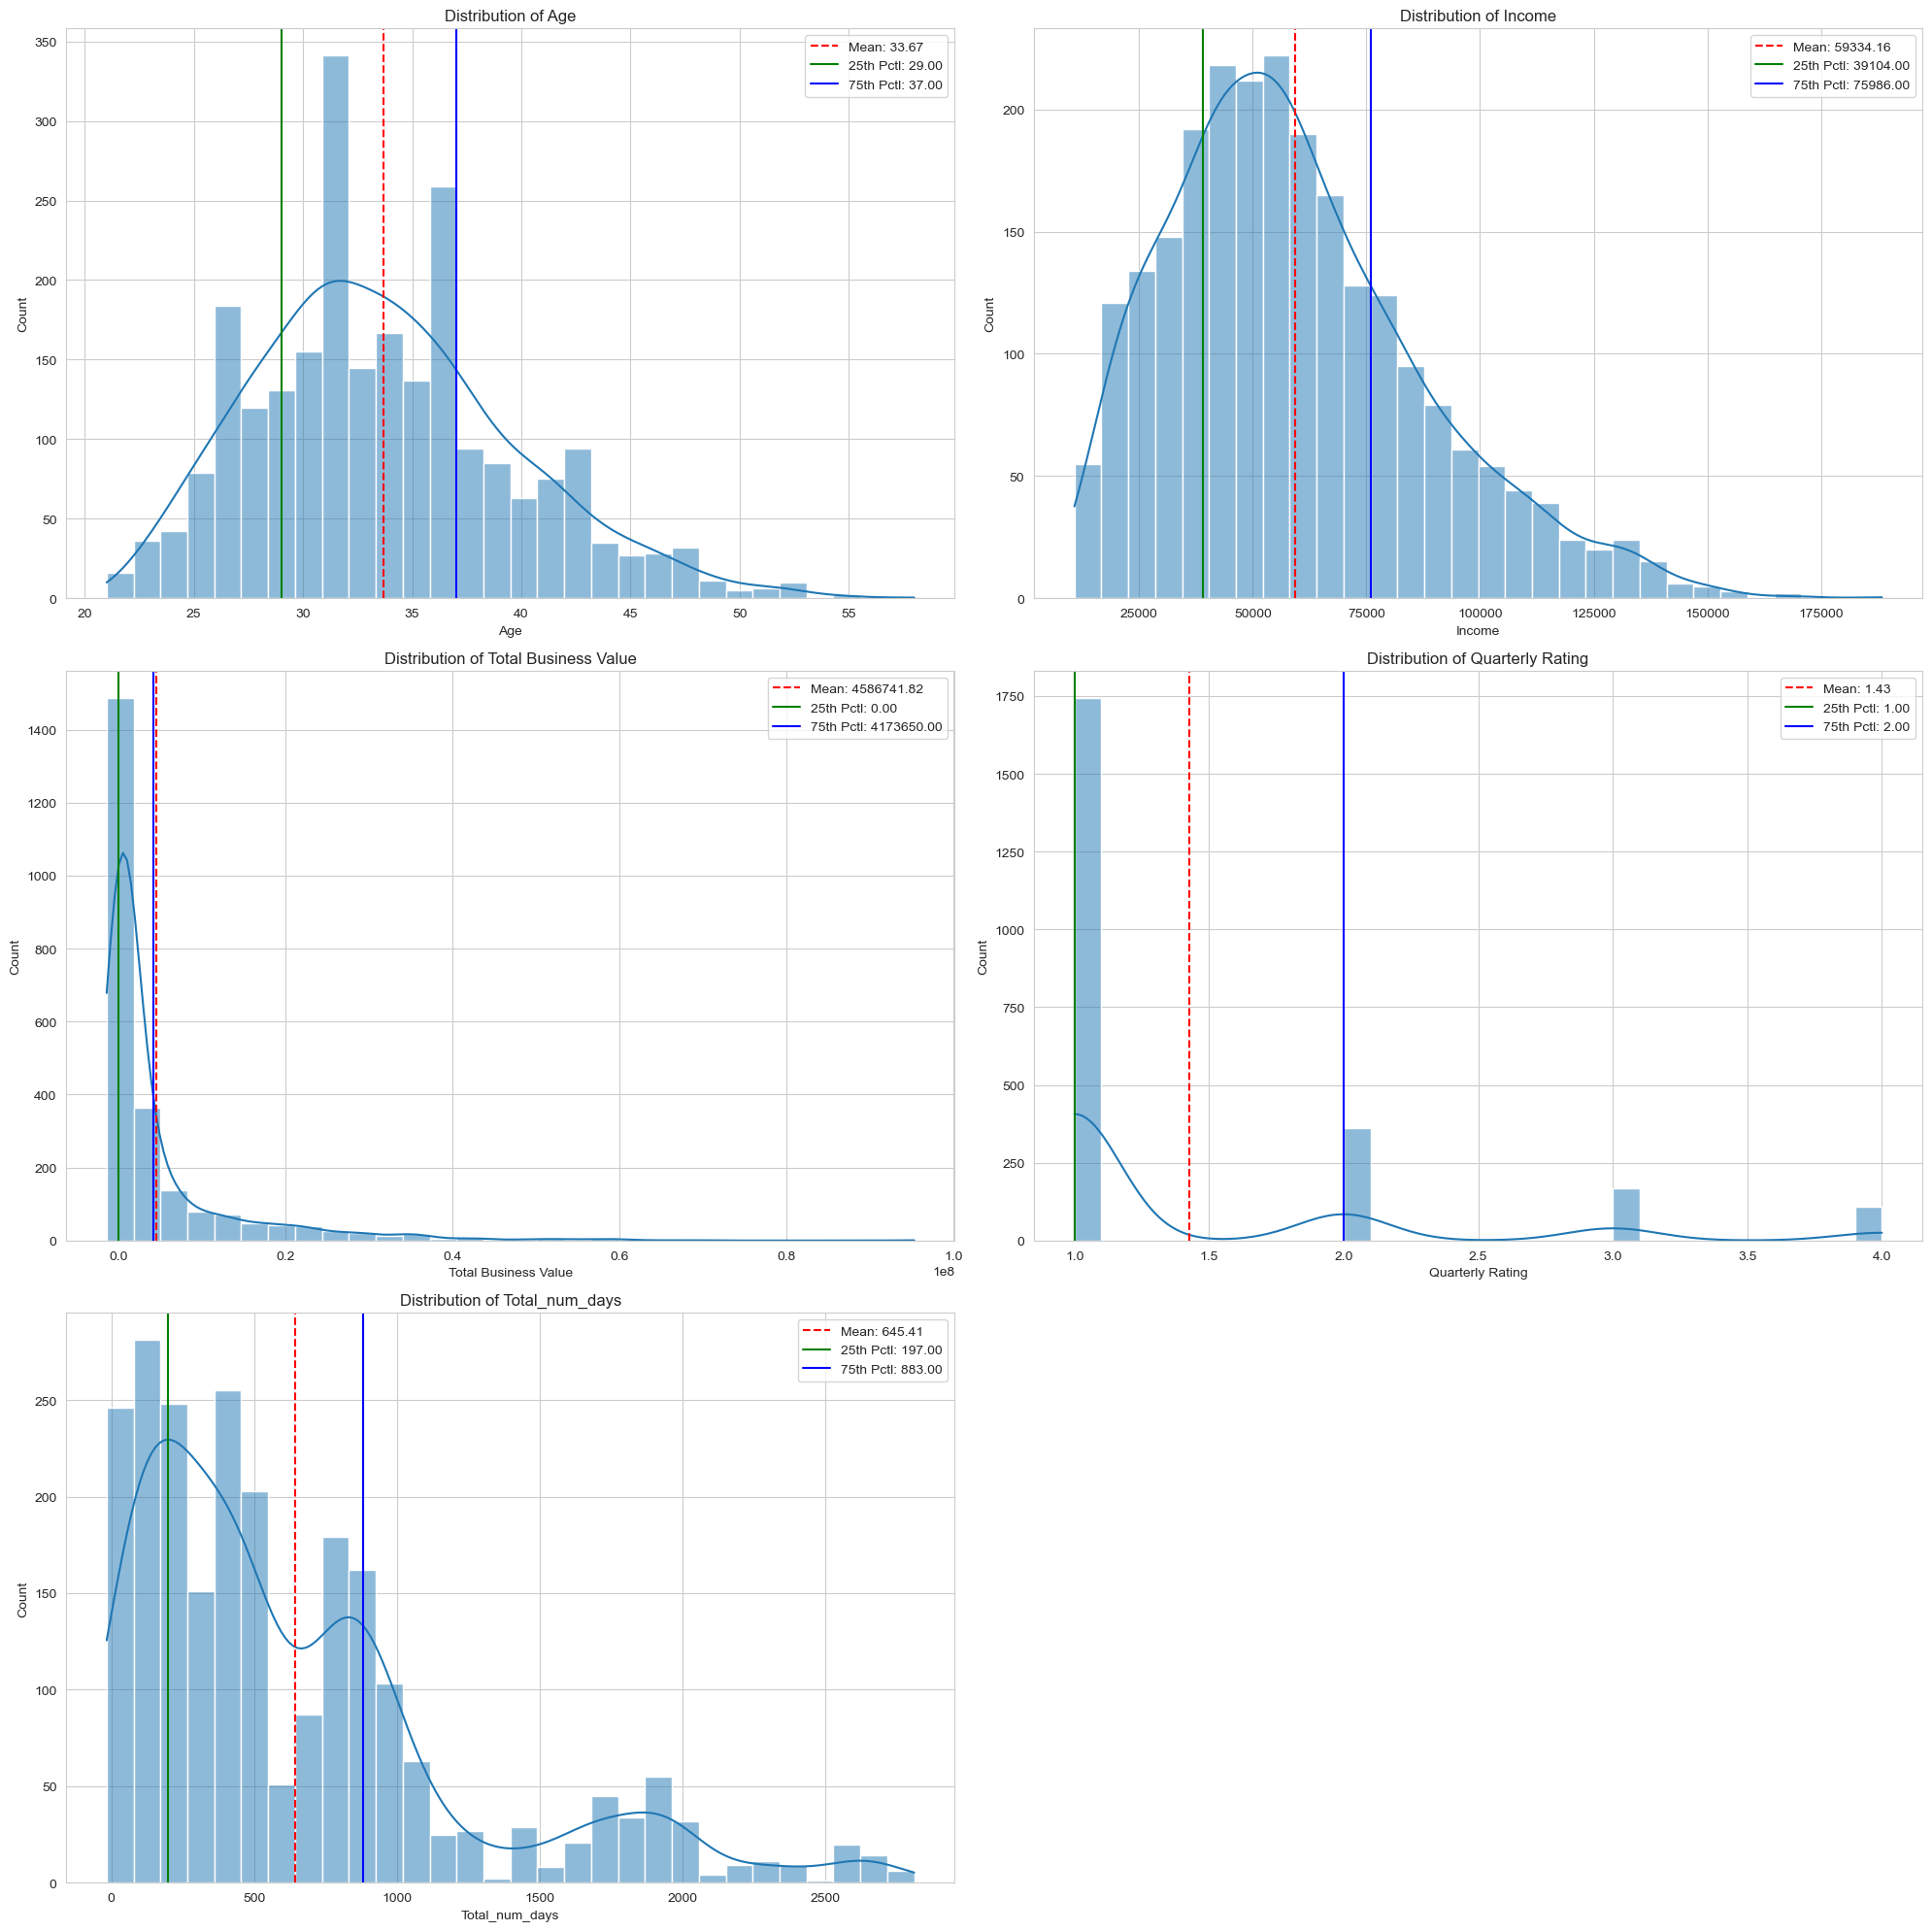

In [19]:
sns.set_style('whitegrid')
num_features = ['Age','Income','Total Business Value', 'Quarterly Rating', 'Total_num_days']

plt.figure(figsize=(20,20))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3,2,i)
    sns.histplot(aggregated_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    mean_val = aggregated_data[feature].mean()
    percentile_25 = aggregated_data[feature].quantile(0.25)
    percentile_75 = aggregated_data[feature].quantile(0.75)
    
    plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(percentile_25, color='g', linestyle='-', label=f'25th Pctl: {percentile_25:.2f}')
    plt.axvline(percentile_75, color='b', linestyle='-', label=f'75th Pctl: {percentile_75:.2f}')
    plt.legend()
plt.tight_layout()
plt.show()


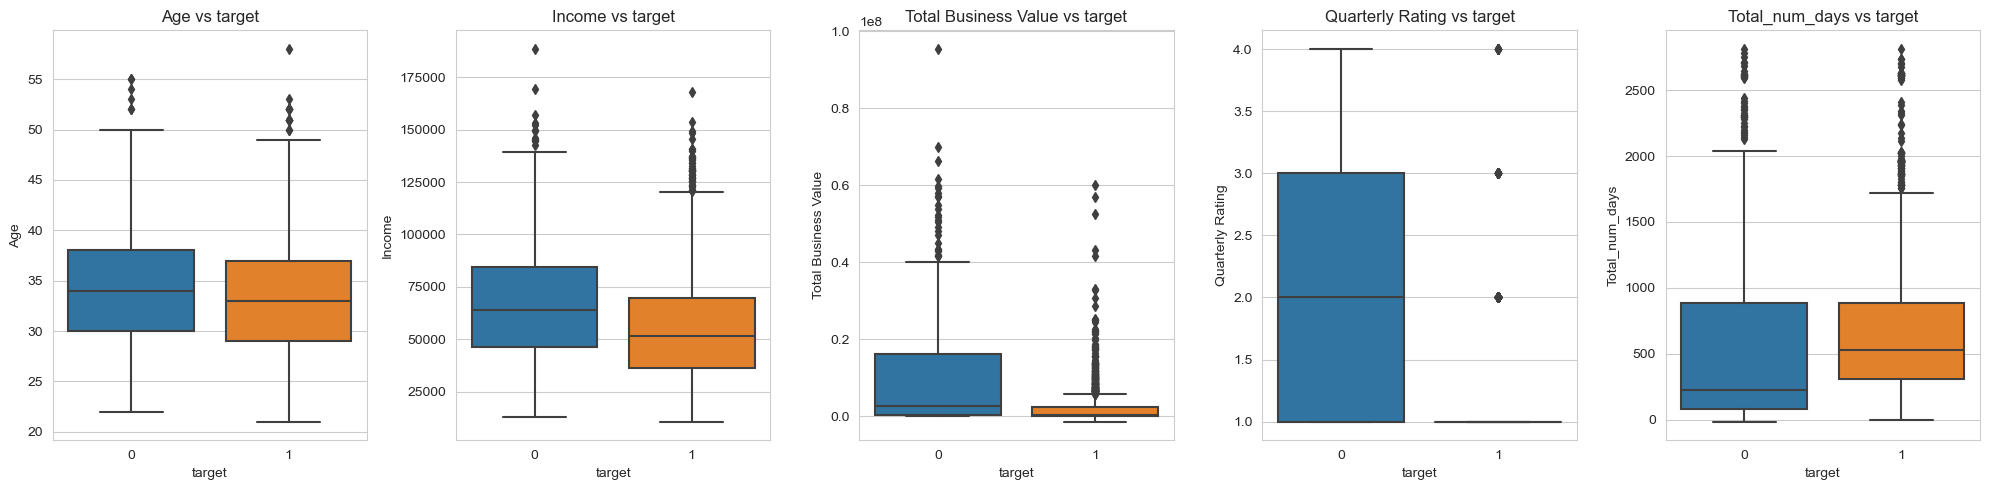

In [20]:
plt.figure(figsize=(20,5))
for i, feature in enumerate(num_features, 1):
    plt.subplot(1,5,i)
    sns.boxplot(x='target', y=feature, data=aggregated_data)
    plt.title(f'{feature} vs target')
    
plt.tight_layout()
plt.show()

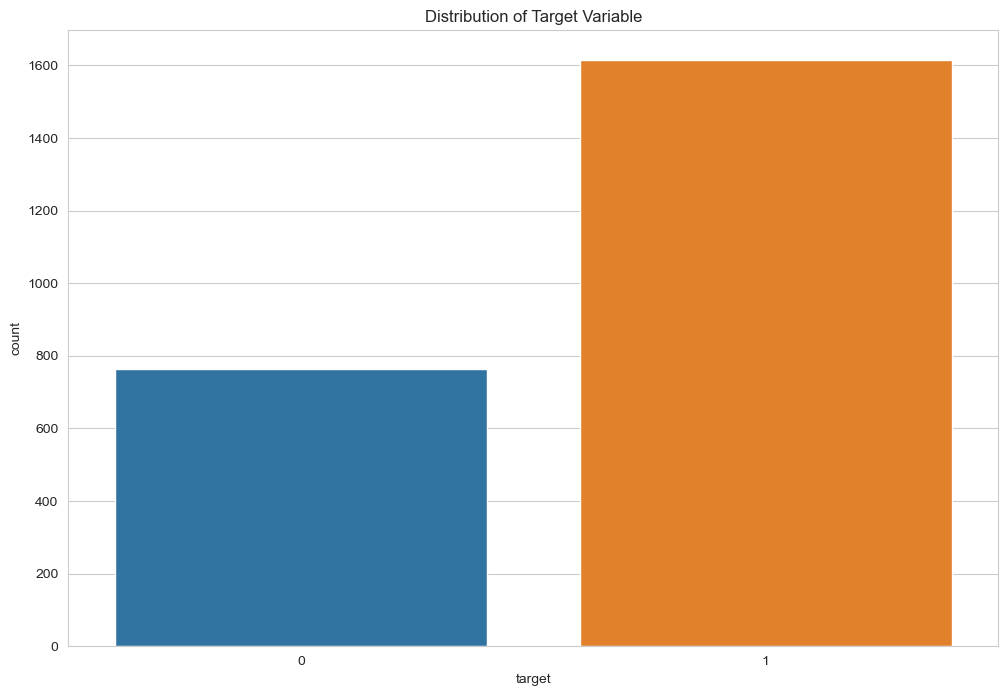

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x='target', data=aggregated_data)
plt.title('Distribution of Target Variable')
plt.show()

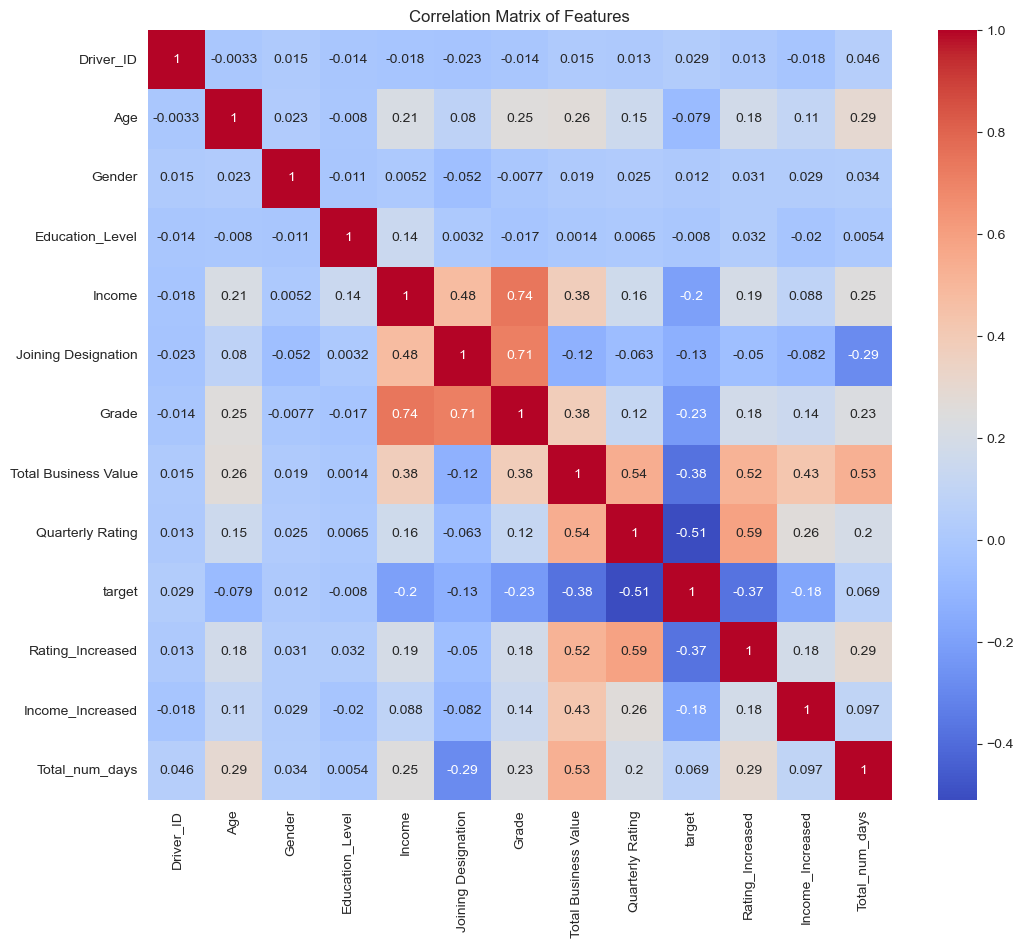

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(aggregated_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

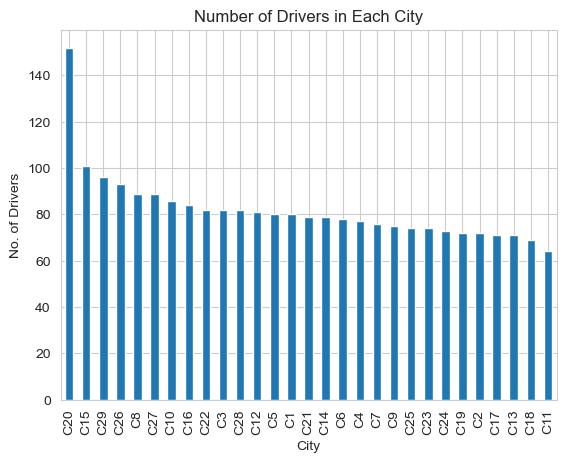

In [23]:
aggregated_data['City'].value_counts().plot(kind='bar')
plt.title('Number of Drivers in Each City')
plt.xlabel('City')
plt.ylabel('No. of Drivers')
plt.show()


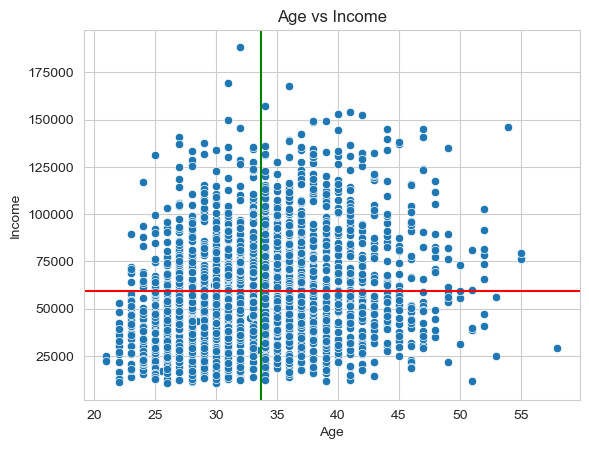

In [24]:
sns.scatterplot(data=aggregated_data, x='Age', y='Income')
average_age = aggregated_data['Age'].mean()
average_income = aggregated_data['Income'].mean()
plt.axhline(average_income, color='r', linestyle='-', label=f'Average Income: {average_income:.2f}')
plt.axvline(average_age, color='g', linestyle='-', label=f'Average Age: {average_age:.2f}')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

cols_to_std = ['Driver_ID', 'Age', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating', 'Rating_Increased', 'Income_Increased', 'Total_num_days']
scaler = StandardScaler()
aggregated_data[cols_to_std] = scaler.fit_transform(aggregated_data[cols_to_std])

In [26]:
aggregated_data = pd.get_dummies(aggregated_data, columns=['City'])

aggregated_data.head()

,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,-1.732720,-0.950273,0.0,1.216049,-0.068616,2018-12-24,2019-03-11,-0.975022,-1.164953,-0.314641,...,0,0,0,0,0,0,0,0,0,0
1,-1.731479,-0.447883,0.0,1.216049,0.270700,2020-11-06,2020-12-12,0.213676,-0.102619,-0.502646,...,0,0,0,0,0,0,0,1,0,0
2,-1.728998,1.561681,0.0,1.216049,0.220907,2019-12-07,2020-04-27,0.213676,-0.102619,-0.464290,...,0,0,0,0,0,0,0,0,0,0
3,-1.727757,-0.782810,0.0,-1.234575,-0.456914,2019-01-09,2019-03-07,-0.975022,-1.164953,-0.489456,...,0,0,0,0,0,0,0,0,0,1
4,-1.726516,-0.447883,1.0,-0.009263,0.683418,2020-07-31,2020-12-12,1.402374,0.959714,-0.364019,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X = aggregated_data.drop(columns=['target', 'Dateofjoining', 'LastWorkingDate'])
y = aggregated_data['target']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       150
           1       0.89      0.93      0.91       327

    accuracy                           0.88       477
   macro avg       0.87      0.85      0.86       477
weighted avg       0.88      0.88      0.88       477



In [30]:
import xgboost as xgb
xg_boost = xgb.XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum())
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       150
           1       0.90      0.91      0.91       327

    accuracy                           0.87       477
   macro avg       0.85      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477



In [32]:
from imblearn.over_sampling import SMOTE
X = aggregated_data.drop(columns = ['target','Dateofjoining','LastWorkingDate'])
y = aggregated_data['target']

smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X,y)
resampled_data = pd.concat([X_resample, y_resample], axis=1)

print("Class distribution after SMOTE:\n", resampled_data['target'].value_counts())

Class distribution after SMOTE:
 1    1616
0    1616
Name: target, dtype: int64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       326
           1       0.93      0.89      0.91       321

    accuracy                           0.91       647
   macro avg       0.91      0.91      0.91       647
weighted avg       0.91      0.91      0.91       647



In [35]:
xg_boost = xgb.XGBClassifier(random_state = 42)
xg_boost.fit(X_train, y_train)
y_pred = xg_boost.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       326
           1       0.91      0.88      0.90       321

    accuracy                           0.90       647
   macro avg       0.90      0.90      0.90       647
weighted avg       0.90      0.90      0.90       647



In [37]:
new_report = []

In [38]:
from sklearn.model_selection import StratifiedKFold
rand_forest = RandomForestClassifier(random_state=42)
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

new_report = []

for train_index, test_index in k_fold.split(X_resample, y_resample):
    X_train, X_test = X_resample.iloc[train_index], X_resample.iloc[test_index]
    y_train, y_test = y_resample.iloc[train_index], y_resample.iloc[test_index]
    
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)
    
    new_report.append(classification_report(y_test, y_pred))

In [39]:
for i, report in enumerate(new_report, 1):
    print(f'Fold {i} Classification Report:')
    print(report)

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       162
           1       0.90      0.87      0.89       162

    accuracy                           0.89       324
   macro avg       0.89      0.89      0.89       324
weighted avg       0.89      0.89      0.89       324

Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       162
           1       0.94      0.90      0.91       162

    accuracy                           0.92       324
   macro avg       0.92      0.92      0.92       324
weighted avg       0.92      0.92      0.92       324

Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       161
           1       0.92      0.83      0.87       162

    accuracy                           0.88       323
   macro avg       0.88      0.88     

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, rand_forest.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

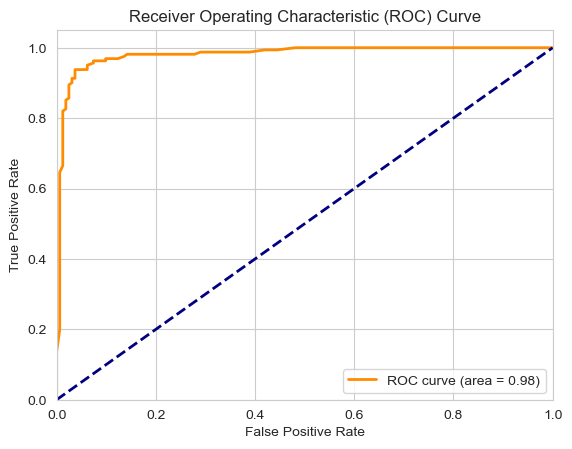

In [43]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_arr = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_report_str)

print("\nConfusion Matrix:")
print(confusion_matrix_arr)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       162
           1       0.94      0.94      0.94       161

    accuracy                           0.94       323
   macro avg       0.94      0.94      0.94       323
weighted avg       0.94      0.94      0.94       323


Confusion Matrix:
[[153   9]
 [ 10 151]]
